# Evaluation Criteria Notebook

The second assignment is the evaluation criteria. To test suitable tools and ensure adequate methodology this notebook was created as a companion to the associated report.

In [18]:
#---------------------------------- IMPORTANT PACKAGES --------------------------------------------#
print('-------------Importing Useful packages------------')
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import os
from PIL import Image
import matplotlib.pyplot as plt

# Data pre-processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

# Metrics
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference, equalized_odds_ratio, demographic_parity_ratio
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score, precision_recall_curve, RocCurveDisplay


-------------Importing Useful packages------------


In [57]:
#----------------------------------- DATA LOADING -------------------------------------------#
print('-----------------Reading CSV file into dataframe-------------------')
data = pd.read_csv('../heart.csv')

-----------------Reading CSV file into dataframe-------------------


In [56]:
data.head()
data.shape
data.info()
#Statistics
data.describe().T


<class 'pandas.core.frame.DataFrame'>
Index: 904 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             904 non-null    int64  
 1   Sex             904 non-null    object 
 2   ChestPainType   904 non-null    object 
 3   RestingBP       904 non-null    int64  
 4   Cholesterol     904 non-null    int64  
 5   FastingBS       904 non-null    int64  
 6   RestingECG      904 non-null    object 
 7   MaxHR           904 non-null    int64  
 8   ExerciseAngina  904 non-null    object 
 9   Oldpeak         904 non-null    float64
 10  ST_Slope        904 non-null    object 
 11  HeartDisease    904 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 91.8+ KB


,count,mean,std,min,25%,50%,75%,max
Age,904.0,53.528761,9.431648,28.0,47.0,54.0,60.0,77.0
RestingBP,904.0,132.806416,17.952414,80.0,120.0,130.0,140.0,200.0
Cholesterol,904.0,201.700221,107.570543,0.0,177.0,223.0,268.0,603.0
FastingBS,904.0,0.227876,0.419694,0.0,0.0,0.0,0.0,1.0
MaxHR,904.0,136.969027,25.337263,60.0,120.0,138.0,156.0,202.0
Oldpeak,904.0,0.913606,1.047342,0.0,0.0,0.6,1.5,6.2
HeartDisease,904.0,0.550885,0.497679,0.0,0.0,1.0,1.0,1.0


In [67]:
#----------------------------------- DATA PREPROCESSING -------------------------------------------#
print('-------------------Preprocessing-------------------------')
# Outliers
# data.drop(data[data['RestingBP']==0].index, inplace=True)
# data.drop(data[data['Oldpeak']<0].index, inplace=True)
# data.drop(data[data.Oldpeak < 0].index, inplace=True)

# data = data[data['Oldpeak'] >= 0]
# data= data[data['RestingBP'] > 0]

# Scaling
robust_scale = RobustScaler()
standard_scale = StandardScaler()
minmax_scaler = MinMaxScaler()
# Encoding
ohe= OneHotEncoder()
le = LabelEncoder()

# Categorical Data Encoding
# data['Sex'] = ohe.fit_transform(data['Sex'])
# data['ChestPainType'] = ohe.fit_transform(data['ChestPainType'])
# data['RestingECG'] = ohe.fit_transform(data['RestingECG'])
# data['ExerciseAngina'] = ohe.fit_transform(data['ExerciseAngina'])
# data['ST_Slope'] = ohe.fit_transform(data['ST_Slope'])


data['Sex'] = le.fit_transform(data['Sex'])
data['ChestPainType'] = le.fit_transform(data['ChestPainType'])
data['RestingECG'] = le.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = le.fit_transform(data['ST_Slope'])

#data = pd.get_dummies(data, columns=['Sex','ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=False)

# Scaling Numerical Data
data['Oldpeak'] = robust_scale.fit_transform(data[['Oldpeak']])
data['Age'] = robust_scale.fit_transform(data[['Age']])
data['RestingBP'] = robust_scale.fit_transform(data[['RestingBP']])
data['Cholesterol'] = robust_scale.fit_transform(data[['Cholesterol']])
data['MaxHR'] = robust_scale.fit_transform(data[['MaxHR']])


-------------------Preprocessing-------------------------


In [68]:
# data[data['RestingBP'] > 0]
# data.drop(data[data['RestingBP']<= 0].index)
# data[data['Oldpeak'] < 0]
# data.info()
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.076923,1,1,0.5,0.704000,0,1,0.944444,0,-0.400000,2,0
1,-0.384615,0,2,1.5,-0.458667,0,1,0.500000,0,0.266667,1,1
2,-1.307692,1,1,0.0,0.640000,0,2,-1.111111,0,-0.400000,2,0
3,-0.461538,0,0,0.4,-0.096000,0,1,-0.833333,1,0.600000,1,1
4,0.000000,1,2,1.0,-0.298667,0,1,-0.444444,0,-0.400000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.692308,1,3,-1.0,0.437333,0,1,-0.166667,0,0.400000,1,1
914,1.076923,1,0,0.7,-0.320000,1,1,0.083333,0,1.866667,1,1
915,0.230769,1,0,0.0,-0.981333,0,1,-0.638889,1,0.400000,1,1
916,0.230769,0,1,0.0,0.138667,0,0,1.000000,0,-0.400000,1,1


In [73]:
#----------------------------------- SPLIT DATA -------------------------------------------#
print('------------Spliting Data------------')
target= data['HeartDisease']
features= data.drop('HeartDisease', axis=1)
x_dev, x_test, y_dev, y_test = train_test_split(features, target, test_size = 0.20, random_state = 0)

------------Spliting Data------------


In [ ]:
#-------------------------------------- PERFORMANCE METRICS ----------------------------------------#
# Metrics Function
def metrics(y_test, y_pred):
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # counts = [value for value in cm.flatten()]
    # percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    # labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    # labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = True)# labels,fmt ='')
    
    # Precision, Recall, F1 score
    print(classification_report(y_test,y_pred))
    print(roc_auc_score(y_test,y_pred))

    # ROC
    RocCurveDisplay.from_predictions(y_test,y_pred)
    plt.title('ROC_AUC_Plot')
    plt.show()

#------------------------------------ FAIRNESS EVALUATION ------------------------------------------#
def fairness(x_test, y_test, y_pred):
    age_sensitive= x_test['Age']
    sex_sensitive = x_test['Sex']
    # Demographic Parity
    age_dpd = demographic_parity_difference(y_test, y_pred, sensitive_features=age_sensitive)
    sex_dpd = demographic_parity_difference(y_test, y_pred, sensitive_features=sex_sensitive)
    age_dpr = demographic_parity_ratio(y_test, y_pred, sensitive_features=age_sensitive)
    sex_dpr = demographic_parity_ratio(y_test, y_pred, sensitive_features=sex_sensitive)
    print(f'The Age Demographic Parity Difference is: {age_dpd}')
    print(f'The Age Demographic Parity Ratio is: {age_dpr}')
    print(f'The Sex Demographic Parity Difference is: {sex_dpd}')
    print(f'The Sex Demographic Parity Ratio is: {sex_dpr}')

    # equalized_odds
    age_eod = equalized_odds_difference(y_test, y_pred, sensitive_features=age_sensitive)
    sex_eod = equalized_odds_difference(y_test, y_pred, sensitive_features=sex_sensitive)
    age_eor = equalized_odds_ratio(y_test, y_pred, sensitive_features=age_sensitive)
    sex_eor = equalized_odds_ratio(y_test, y_pred, sensitive_features=sex_sensitive)
    print(f'The Age Equalized Odds Difference is: {age_eod}')
    print(f'The Age Equalized Odds Ratio is: {age_eor}')
    print(f'The Sex Equalized Odds Difference is: {sex_eod}')
    print(f'The Sex Equalized Odds Ratio is: {sex_eor}')


In [81]:
# Model
def model(classifier, x_dev, x_test, y_dev, y_test ):
    kf=StratifiedKFold(n_splits=9)
    for fold , (train,validate) in enumerate(kf.split(X=x_dev,y=y_dev)):
        
        X_train=x_dev.iloc[train]
        y_train=y_dev.iloc[train]
        
        X_valid=x_dev.iloc[validate]
        y_valid=y_dev.iloc[validate]
        
        classifier.fit(X_train,y_train)
        
        y_pred=classifier.predict(X_valid)
        print(f"The fold is : {fold} : ")
        print(classification_report(y_valid,y_pred))
        acc=roc_auc_score(y_valid,y_pred)
        print(f"The accuracy for Fold {fold+1} : {acc}")
        pass

    y_pred = classifier.predict(x_test)
    metrics(y_test, y_pred, classifier)
    fairness(x_test, y_test, y_pred)


In [ ]:
# Add feature importance later
        # #feature importance
        # print(classifier.feature_importances)
        # feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
        # feat_importances.nlargest(13).plot(kind='barh')
        # plt.show()

--------------------------Support Vector Matrix----------------------------------
The fold is : 0 : 
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        37
           1       0.56      1.00      0.72        45

    accuracy                           0.57        82
   macro avg       0.78      0.53      0.41        82
weighted avg       0.76      0.57      0.44        82

The accuracy for Fold 1 : 0.527027027027027
The fold is : 1 : 
              precision    recall  f1-score   support

           0       1.00      0.19      0.32        37
           1       0.60      1.00      0.75        45

    accuracy                           0.63        82
   macro avg       0.80      0.59      0.53        82
weighted avg       0.78      0.63      0.56        82

The accuracy for Fold 2 : 0.5945945945945945
The fold is : 2 : 
              precision    recall  f1-score   support

           0       1.00      0.16      0.28        37
         

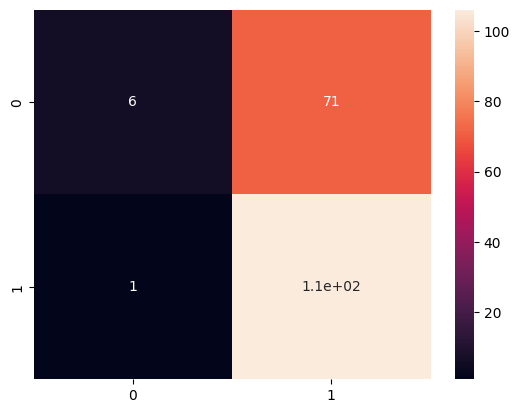

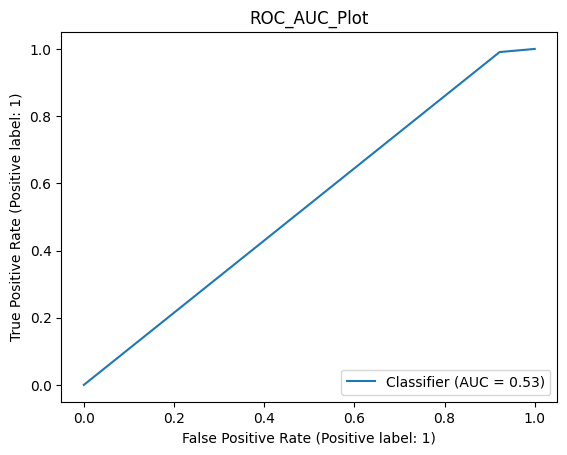

The Age Demographic Parity Difference is: 0.4
The Age Demographic Parity Ratio is: 0.6
The Sex Demographic Parity Difference is: 0.051550108147080054
The Sex Demographic Parity Ratio is: 0.946997776130467
The Age Equalized Odds Difference is: 1.0
The Age Equalized Odds Ratio is: 0.0
The Sex Equalized Odds Difference is: 0.11111111111111116
The Sex Equalized Odds Ratio is: 0.8888888888888888


In [82]:
#----------------------------------- SUPPORT VECTOR MATRIX MODEL -------------------------------------------#
print('--------------------------Support Vector Matrix----------------------------------')
model(SVC(random_state=0, gamma = 10, C=10), x_dev, x_test, y_dev, y_test )


-----------------------------K Nearest Neighbor-----------------------------
The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.85      0.78      0.82        37
           1       0.83      0.89      0.86        45

    accuracy                           0.84        82
   macro avg       0.84      0.84      0.84        82
weighted avg       0.84      0.84      0.84        82

The accuracy for Fold 1 : 0.8363363363363363
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        37
           1       0.83      0.84      0.84        45

    accuracy                           0.82        82
   macro avg       0.82      0.81      0.81        82
weighted avg       0.82      0.82      0.82        82

The accuracy for Fold 2 : 0.8141141141141142
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        37
           1 

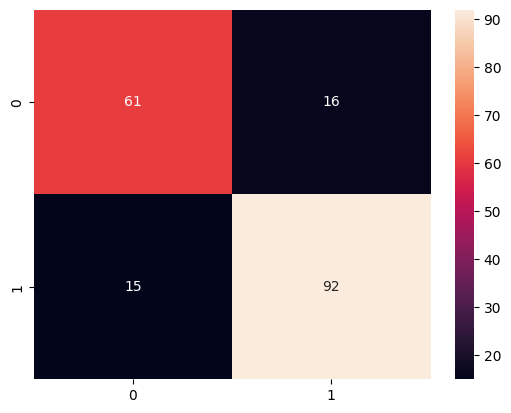

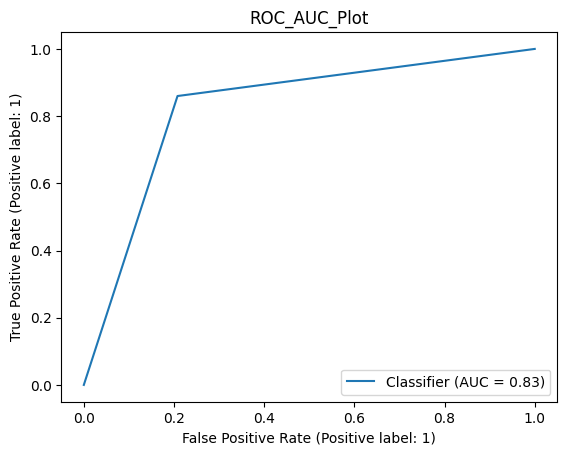

The Age Demographic Parity Difference is: 1.0
The Age Demographic Parity Ratio is: 0.0
The Sex Demographic Parity Difference is: 0.4080749819754867
The Sex Demographic Parity Ratio is: 0.3920515574650913
The Age Equalized Odds Difference is: 1.0
The Age Equalized Odds Ratio is: 0.0
The Sex Equalized Odds Difference is: 0.33219954648526073
The Sex Equalized Odds Ratio is: 0.6257982120051085


In [83]:
#------------------------------------  K-NEAREST NEIGHBBOR ------------------------------------------#
print('-----------------------------K Nearest Neighbor-----------------------------')
model(KNeighborsClassifier(n_neighbors=5), x_dev, x_test, y_dev, y_test)


---------------------------Random Forest Vector--------------------------------
The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        37
           1       0.87      0.87      0.87        45

    accuracy                           0.85        82
   macro avg       0.85      0.85      0.85        82
weighted avg       0.85      0.85      0.85        82

The accuracy for Fold 1 : 0.8522522522522522
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.85      0.78      0.82        37
           1       0.83      0.89      0.86        45

    accuracy                           0.84        82
   macro avg       0.84      0.84      0.84        82
weighted avg       0.84      0.84      0.84        82

The accuracy for Fold 2 : 0.8363363363363363
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        37
          

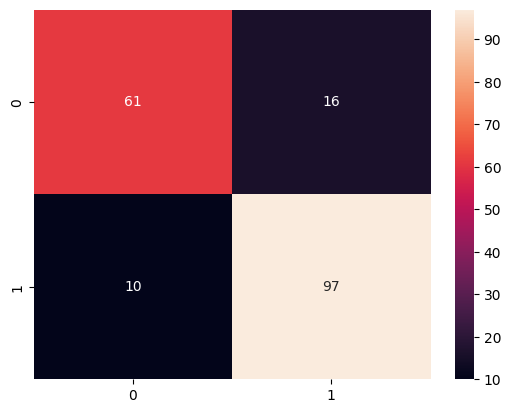

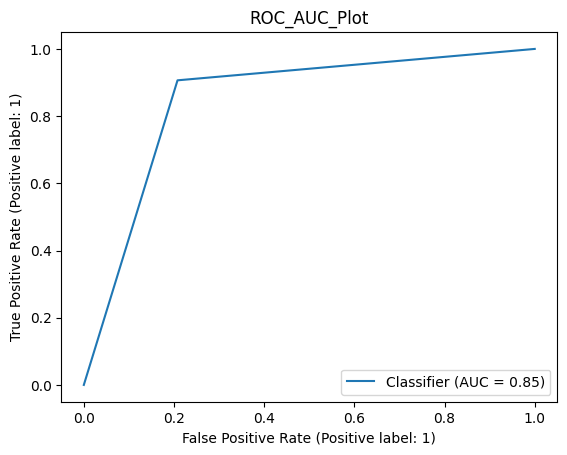

The Age Demographic Parity Difference is: 1.0
The Age Demographic Parity Ratio is: 0.0
The Sex Demographic Parity Difference is: 0.4754866618601298
The Sex Demographic Parity Ratio is: 0.3324898785425101
The Age Equalized Odds Difference is: 1.0
The Age Equalized Odds Ratio is: 0.0
The Sex Equalized Odds Difference is: 0.3832199546485261
The Sex Equalized Odds Ratio is: 0.5517241379310345


In [85]:
#-------------------------------------- RANDOM FOREST CLASSIFIER ----------------------------------------#
print('---------------------------Random Forest Vector--------------------------------')
model(RandomForestClassifier(random_state=0, n_estimators=100, min_samples_split=5, max_depth=10), x_dev, x_test, y_dev, y_test )


Add range

Stratify results
> see the possibilities
> try combining sensitive areas(young, old 
use fairlearn to define subsets annd see how they relate
> Stratified F1 score accross yiung-female, young-male, old female, old male

---------------------------------------Ada Boost-----------------------
The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        37
           1       0.78      0.80      0.79        45

    accuracy                           0.77        82
   macro avg       0.77      0.76      0.77        82
weighted avg       0.77      0.77      0.77        82

The accuracy for Fold 1 : 0.7648648648648648
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        37
           1       0.79      0.84      0.82        45

    accuracy                           0.79        82
   macro avg       0.79      0.79      0.79        82
weighted avg       0.79      0.79      0.79        82

The accuracy for Fold 2 : 0.7870870870870871
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        37
           1      

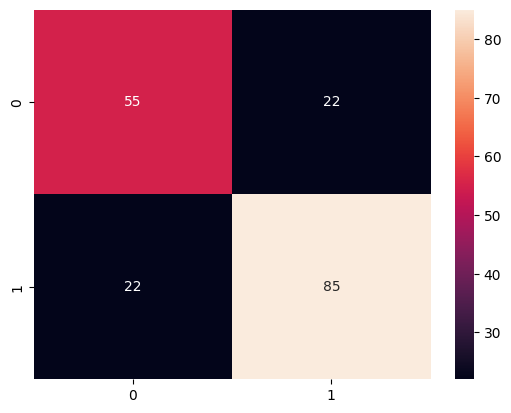

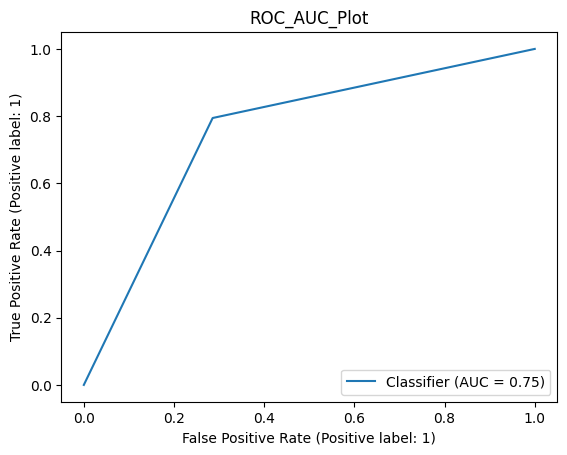

The Age Demographic Parity Difference is: 1.0
The Age Demographic Parity Ratio is: 0.0
The Sex Demographic Parity Difference is: 0.20223503965392942
The Sex Demographic Parity Ratio is: 0.6755349913244649
The Age Equalized Odds Difference is: 1.0
The Age Equalized Odds Ratio is: 0.0
The Sex Equalized Odds Difference is: 0.03951149425287359
The Sex Equalized Odds Ratio is: 0.8726851851851851


In [87]:
#-------------------------------------- ADABOOST ----------------------------------------#
# hyperparameter tuning
print('---------------------------------------Ada Boost-----------------------')
model(AdaBoostClassifier(random_state=0, n_estimators=100, learning_rate=0.001), x_dev, x_test, y_dev, y_test )


## References
https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem
https://www.kaggle.com/code/durgancegaur/data-imbalance-eda-87-auc?scriptVersionId=88319036